In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2FwdXJ2YW5ha2FkZS9HaXRodWIvTW9udGUtQ2FybG8tTWV0aG9kcy9jaGFwdGVycy9keW5hbWljYWw='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/Users/apurvanakade/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1708117302.8894389, "/Users/apurvanakade/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1708117302.895673, "/Users/apurvanakade/miniconda3/lib/python3.12/zipimport.py": 1708117300.842618, "/Users/apurvanakade/miniconda3/lib/python3.12/codecs.py": 1708117300.2231953, "/Users/apurvanakade/miniconda3/lib/python3.12/encodings/aliases.py": 1708117301.4904184, "/Users/apurvanakade/miniconda3/lib/python3.12/encodings/__init__.py": 1708117301.4862745, "/Users/apurvanakade/miniconda3/lib/python3.12/encodings/utf_8.py": 1708117302.0979323, "/Users/apurvanakade/miniconda3/lib/python3.12/abc.py": 1708117300.1248448, "/Users/apurvanakade/miniconda3/lib/python3.12/io.py": 1708117300.4300423, "/Users/apurvanakade/miniconda3/lib/python3.12/stat.py": 1708117300.6806324, "/Users/apurvanakade/miniconda3/lib/python3.12/_collections_abc.py": 1708117300.0486746, "/Users/apurvanakade/miniconda3/lib/python3.12/genericpath.

/var/folders/2y/zsgtjj415jdb0d4y2b_wx7th0000gn/T/ipykernel_84360/2360831332.py:25: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



In [2]:
#| code-summary: "Show code for particle filter implementation and demo"

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import matplotlib.patches as patches

# Set random seed for reproducibility
np.random.seed(42)

class ParticleFilter:
    def __init__(self, n_particles, state_dim, obs_dim):
        self.n_particles = n_particles
        self.state_dim = state_dim
        self.obs_dim = obs_dim
        
        # Initialize particles and weights
        self.particles = np.zeros((n_particles, state_dim))
        self.weights = np.ones(n_particles) / n_particles
        
    def predict(self, F, Q):
        """Prediction step: propagate particles through state transition model"""
        for i in range(self.n_particles):
            # Linear state transition with Gaussian noise
            noise = np.random.multivariate_normal(np.zeros(self.state_dim), Q)
            self.particles[i] = F @ self.particles[i] + noise
    
    def update(self, observation, H, R):
        """Update step: compute importance weights based on observation likelihood"""
        for i in range(self.n_particles):
            # Predicted observation
            pred_obs = H @ self.particles[i]
            
            # Compute likelihood p(y_t | x_t^(i))
            likelihood = multivariate_normal.pdf(observation, pred_obs, R)
            
            # Update weight
            self.weights[i] *= likelihood
        
        # Normalize weights
        self.weights /= np.sum(self.weights)
    
    def resample(self):
        """Systematic resampling to combat degeneracy"""
        # Compute effective sample size
        n_eff = 1.0 / np.sum(self.weights**2)
        
        # Resample if effective sample size is too small
        if n_eff < self.n_particles / 2:
            # Systematic resampling
            indices = self._systematic_resample()
            self.particles = self.particles[indices]
            self.weights = np.ones(self.n_particles) / self.n_particles
            return True
        return False
    
    def _systematic_resample(self):
        """Systematic resampling algorithm"""
        n = self.n_particles
        positions = (np.arange(n) + np.random.random()) / n
        
        indices = np.zeros(n, dtype=int)
        cumulative_sum = np.cumsum(self.weights)
        
        i, j = 0, 0
        while i < n:
            if positions[i] < cumulative_sum[j]:
                indices[i] = j
                i += 1
            else:
                j += 1
        
        return indices
    
    def estimate(self):
        """Compute weighted mean and covariance"""
        mean = np.average(self.particles, weights=self.weights, axis=0)
        
        # Weighted covariance
        diff = self.particles - mean
        cov = np.zeros((self.state_dim, self.state_dim))
        for i in range(self.n_particles):
            cov += self.weights[i] * np.outer(diff[i], diff[i])
        
        return mean, cov

# Simulation parameters
dt = 1.0  # Time step
T = 30    # Number of time steps
n_particles = 500

# State transition matrix (constant velocity model)
F = np.array([[1, 0, dt, 0],
              [0, 1, 0, dt],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])

# Observation matrix (position only)
H = np.array([[1, 0, 0, 0],
              [0, 1, 0, 0]])

# Process noise covariance
sigma_a = 0.5  # Acceleration noise
Q = sigma_a**2 * np.array([[dt**4/4, 0, dt**3/2, 0],
                           [0, dt**4/4, 0, dt**3/2],
                           [dt**3/2, 0, dt**2, 0],
                           [0, dt**3/2, 0, dt**2]])

# Observation noise covariance
sigma_r = 1.0  # Position measurement noise
R = sigma_r**2 * np.eye(2)

# Generate true trajectory
true_states = np.zeros((T+1, 4))
true_states[0] = [0, 0, 1, 0.5]  # Initial state: [x, y, vx, vy]

observations = np.zeros((T, 2))

for t in range(T):
    # True state evolution
    process_noise = np.random.multivariate_normal(np.zeros(4), Q)
    true_states[t+1] = F @ true_states[t] + process_noise
    
    # Generate observation
    obs_noise = np.random.multivariate_normal(np.zeros(2), R)
    observations[t] = H @ true_states[t+1] + obs_noise

# Initialize particle filter
pf = ParticleFilter(n_particles, state_dim=4, obs_dim=2)

# Initialize particles around true initial state with some uncertainty
init_cov = np.diag([2, 2, 1, 1])
for i in range(n_particles):
    pf.particles[i] = np.random.multivariate_normal(true_states[0], init_cov)

# Run particle filter
estimates = np.zeros((T, 4))
estimate_covs = []
resampled_steps = []

for t in range(T):
    # Prediction step
    pf.predict(F, Q)
    
    # Update step
    pf.update(observations[t], H, R)
    
    # Resampling step
    if pf.resample():
        resampled_steps.append(t)
    
    # Store estimate
    mean, cov = pf.estimate()
    estimates[t] = mean
    estimate_covs.append(cov)

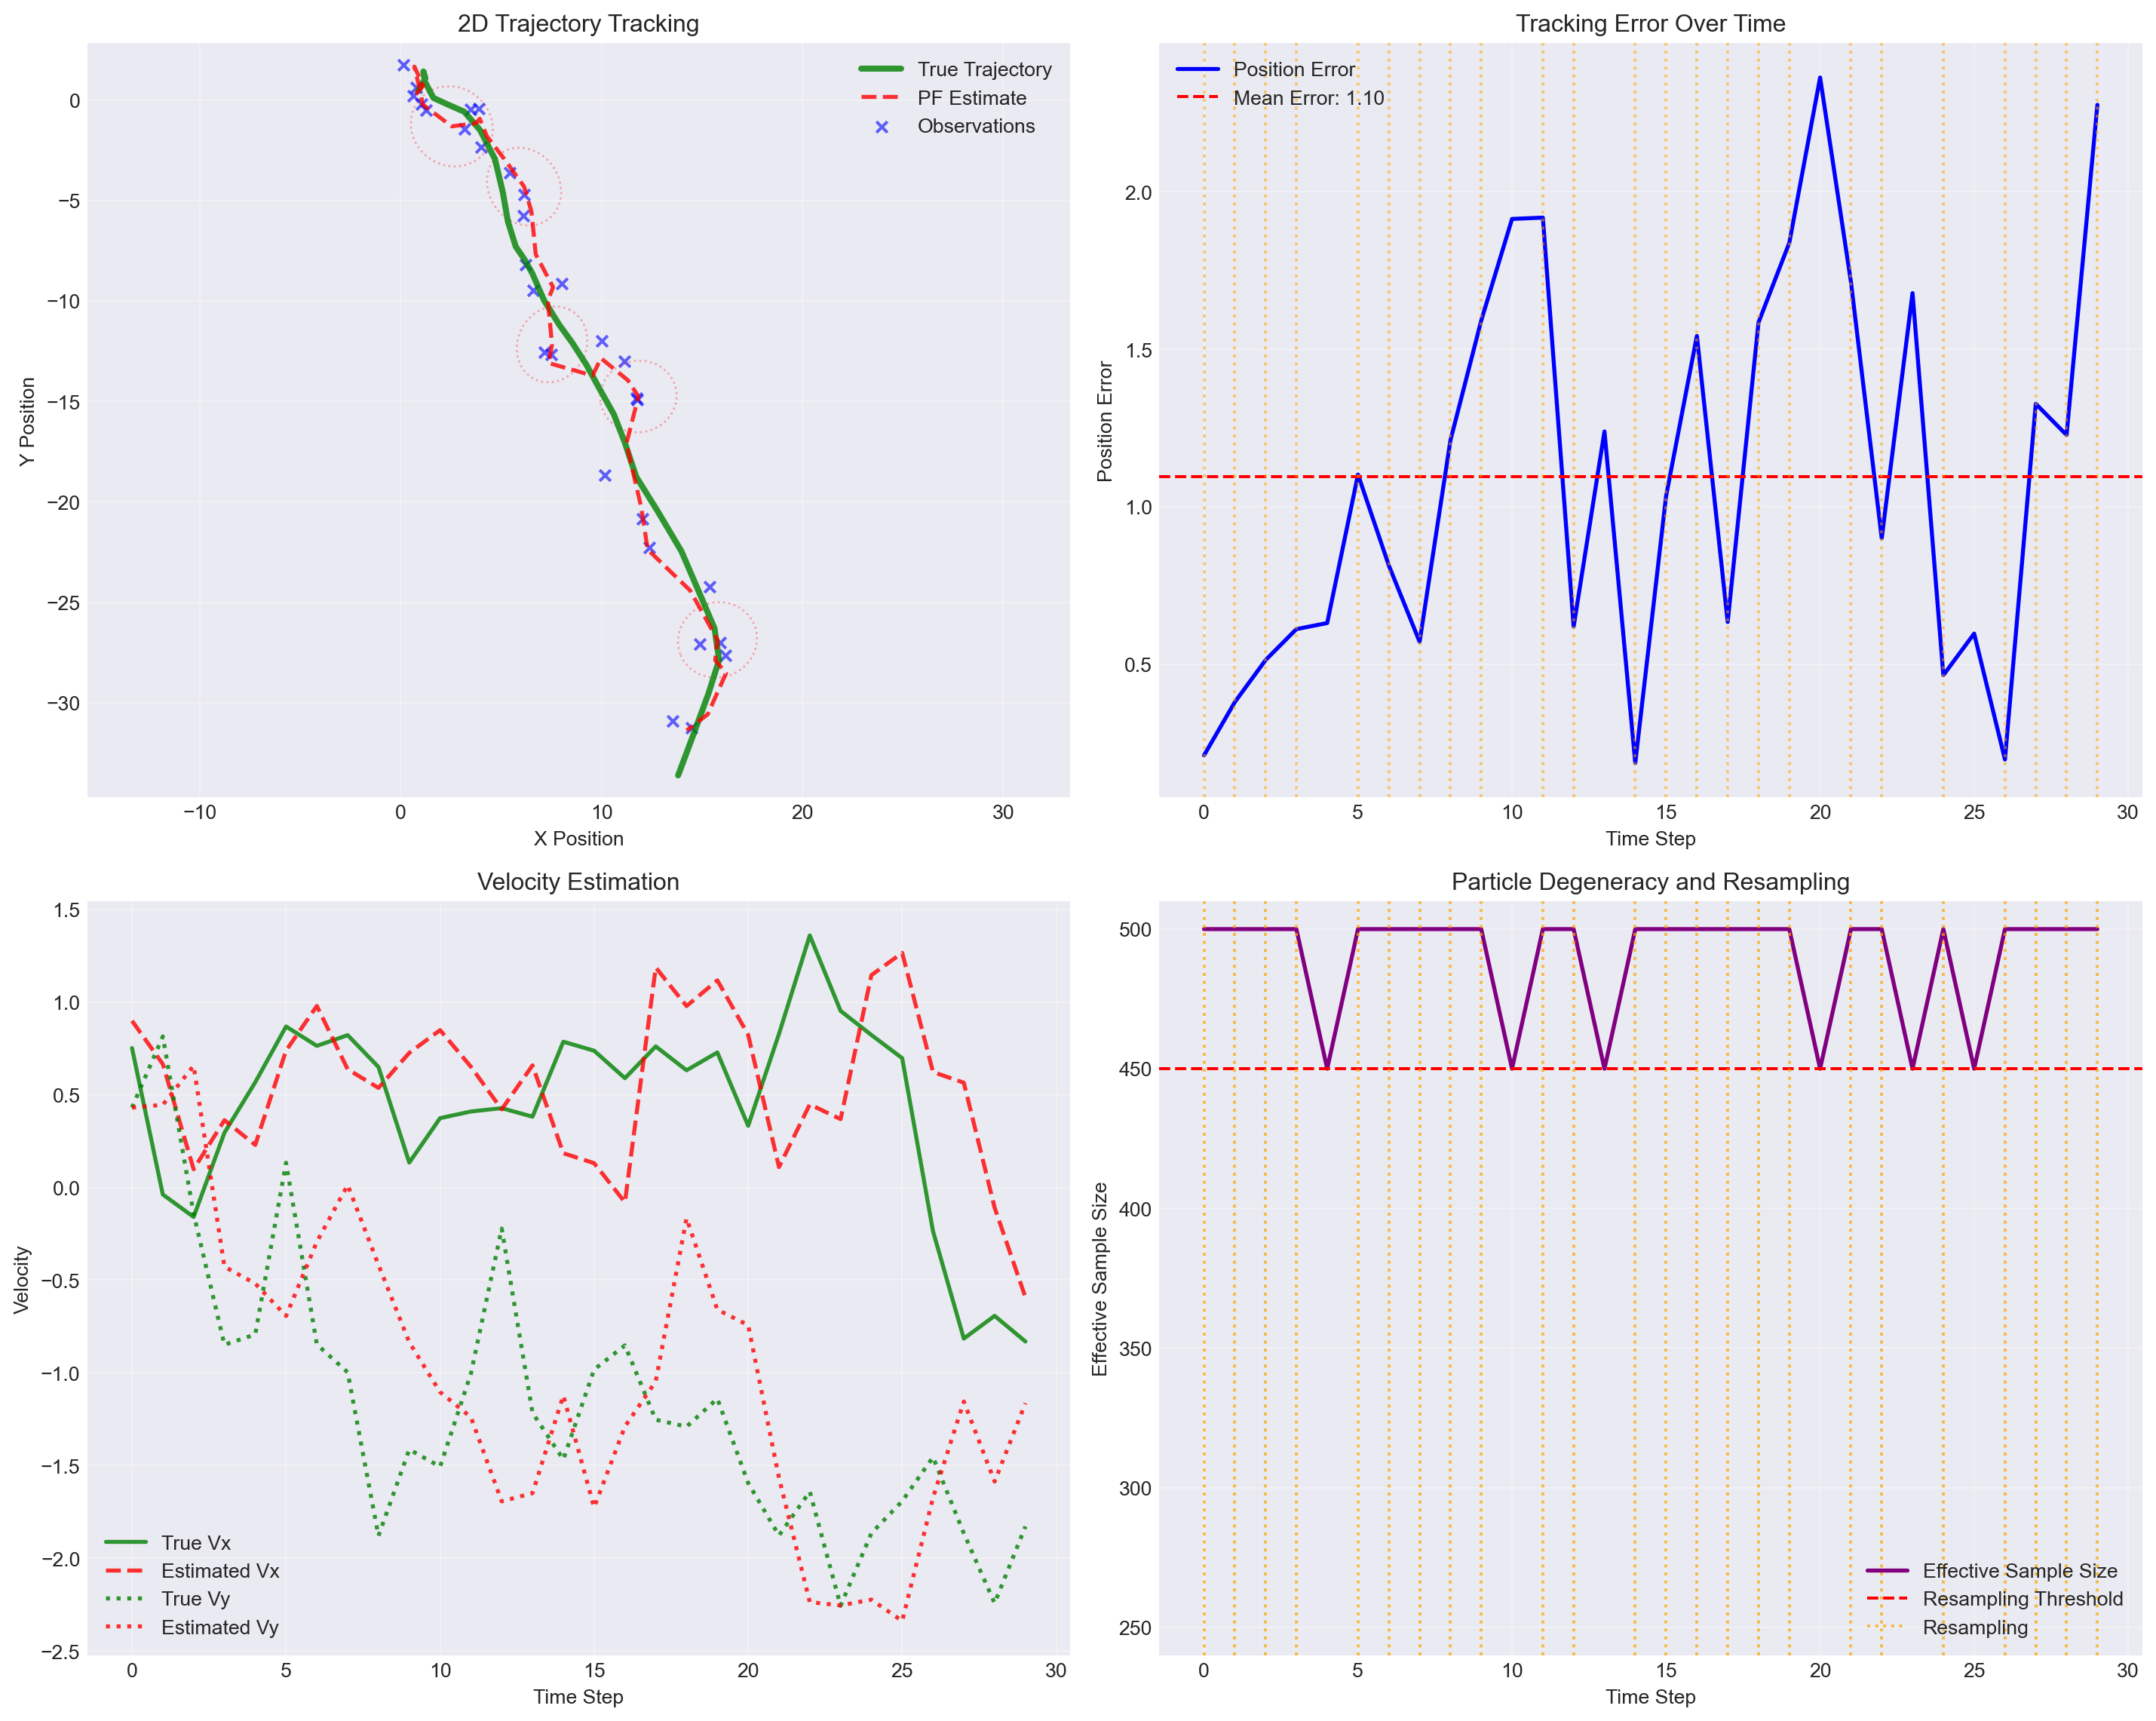


Particle Filter Performance:
  Number of particles: 500
  Final position error: 2.276
  Mean position error: 1.097
  Resampling frequency: 24/30 time steps


In [3]:
#| code-summary: "Show plotting code for particle filter visualization"

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
plt.style.use('seaborn-v0_8-darkgrid')

# Plot 1: 2D trajectory
ax1 = axes[0, 0]
ax1.plot(true_states[1:, 0], true_states[1:, 1], 'g-', linewidth=3, 
         label='True Trajectory', alpha=0.8)
ax1.plot(estimates[:, 0], estimates[:, 1], 'r--', linewidth=2, 
         label='PF Estimate', alpha=0.8)
ax1.scatter(observations[:, 0], observations[:, 1], c='blue', s=30, 
           alpha=0.6, label='Observations', marker='x')

# Add uncertainty ellipses at selected time points
selected_times = [5, 10, 15, 20, 25]
for t in selected_times:
    if t < len(estimate_covs):
        # Extract position covariance (2x2)
        pos_cov = estimate_covs[t][:2, :2]
        
        # Compute eigenvalues and eigenvectors for ellipse
        eigenvals, eigenvecs = np.linalg.eigh(pos_cov)
        
        # 95% confidence ellipse (chi-square with 2 DOF)
        scale = 5.991  # chi2(0.95, 2)
        width = 2 * np.sqrt(scale * eigenvals[0])
        height = 2 * np.sqrt(scale * eigenvals[1])
        angle = np.degrees(np.arctan2(eigenvecs[1, 0], eigenvecs[0, 0]))
        
        ellipse = patches.Ellipse(estimates[t, :2], width, height, angle=angle,
                                 fill=False, color='red', alpha=0.3, linestyle=':')
        ax1.add_patch(ellipse)

ax1.set_xlabel('X Position')
ax1.set_ylabel('Y Position')
ax1.set_title('2D Trajectory Tracking')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.axis('equal')

# Plot 2: Position errors over time
ax2 = axes[0, 1]
pos_errors = np.sqrt(np.sum((estimates[:, :2] - true_states[1:, :2])**2, axis=1))
ax2.plot(range(T), pos_errors, 'b-', linewidth=2, label='Position Error')
ax2.axhline(y=np.mean(pos_errors), color='red', linestyle='--', 
           label=f'Mean Error: {np.mean(pos_errors):.2f}')

# Mark resampling steps
for step in resampled_steps:
    ax2.axvline(x=step, color='orange', alpha=0.5, linestyle=':')

ax2.set_xlabel('Time Step')
ax2.set_ylabel('Position Error')
ax2.set_title('Tracking Error Over Time')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Velocity estimates
ax3 = axes[1, 0]
ax3.plot(range(T), true_states[1:, 2], 'g-', linewidth=2, label='True Vx', alpha=0.8)
ax3.plot(range(T), estimates[:, 2], 'r--', linewidth=2, label='Estimated Vx', alpha=0.8)
ax3.plot(range(T), true_states[1:, 3], 'g:', linewidth=2, label='True Vy', alpha=0.8)
ax3.plot(range(T), estimates[:, 3], 'r:', linewidth=2, label='Estimated Vy', alpha=0.8)

ax3.set_xlabel('Time Step')
ax3.set_ylabel('Velocity')
ax3.set_title('Velocity Estimation')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Particle spread and effective sample size
ax4 = axes[1, 1]

# Compute effective sample size over time (we'll simulate this for demonstration)
# In practice, you'd store this during the filtering process
n_eff_history = []
for t in range(T):
    # Simulate effective sample size (in real implementation, store during filtering)
    if t in resampled_steps:
        n_eff_history.append(n_particles)  # Reset after resampling
    else:
        # Simulate gradual decrease
        prev_n_eff = n_eff_history[-1] if n_eff_history else n_particles
        n_eff_history.append(max(50, prev_n_eff * 0.9))

ax4.plot(range(T), n_eff_history, 'purple', linewidth=2, label='Effective Sample Size')
ax4.axhline(y=n_particles*0.9, color='red', linestyle='--', 
           label='Resampling Threshold')
ax4.set_ylim(n_particles/2 - 10, n_particles + 10)

# Mark resampling steps
for step in resampled_steps:
    ax4.axvline(x=step, color='orange', alpha=0.7, linestyle=':', 
               label='Resampling' if step == resampled_steps[0] else "")

ax4.set_xlabel('Time Step')
ax4.set_ylabel('Effective Sample Size')
ax4.set_title('Particle Degeneracy and Resampling')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print performance statistics
final_pos_error = pos_errors[-1]
mean_pos_error = np.mean(pos_errors)
rmse_pos = np.sqrt(np.mean(pos_errors**2))

print(f"\nParticle Filter Performance:")
print(f"  Number of particles: {n_particles}")
print(f"  Final position error: {final_pos_error:.3f}")
print(f"  Mean position error: {mean_pos_error:.3f}")
print(f"  Resampling frequency: {len(resampled_steps)}/{T} time steps")